# Sample Statistics

"Climate is what you expect. Weather is what you get"

"The process mean is what you expect. The sample mean is what you get" 


Reading:
***Emile-Geay Chapter 4.I and 4.II (p51-58)***

Other readings: 

*https://en.wikipedia.org/wiki/Sampling_distribution*

*https://en.wikipedia.org/wiki/Central_limit_theorem*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# These are some parameters to make figures nice (and big)
plt.rcParams['figure.figsize'] = 16,8
plt.rcParams['text.usetex'] = True
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Sample Mean and the Law of Large Numbers
Consider a gaussian process. Let's say this process has true mean $\mu$ and true variance $\sigma^2$. When we work with random samples in python (or any programming language), the process mean and process variance are the values of $\mu$ and $\sigma$ we pass to the method that generates random samples such as 
<code>stats.norm.rvs(loc=mu,scale=sigma, size=Ndraws)</code> 

We denote a random variable with a Normal/Gaussian distribution with location/mean $\mu$ and scale/variance $\sigma^2$ as

$$ X\sim\mathcal{N}(\mu,\sigma^2)$$

If we only have a sample of this random variable we can estimate the mean using the **sample mean**:

$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i$$ 

The law of large numbers tells us that the sample mean converges to the process mean for a large enough sample. 

https://en.wikipedia.org/wiki/Law_of_large_numbers

$$ \overline{X}_n \rightarrow \mu $$ 

## Estimators
An estimator is a function (rule) for calculating an estimate of a given quantity based on observed data. [Wikipedia article](https://en.wikipedia.org/wiki/Estimator)

For example, given some data from a process, we can estimate the mean of process using the sample mean. In this case, the sample mean is an *estimator* of the process mean.

## Consistency of sample mean
An estimator is consistent if it asymptotes to the process value *as the size of the value increases*. For the mean,  that statement of consistency is precisely the law of large numbers:

$$\overline{X}_n \rightarrow \mu  \text{ as } n\rightarrow \infty$$


Let's convince ourself of the consistence of sample mean with some numerics:


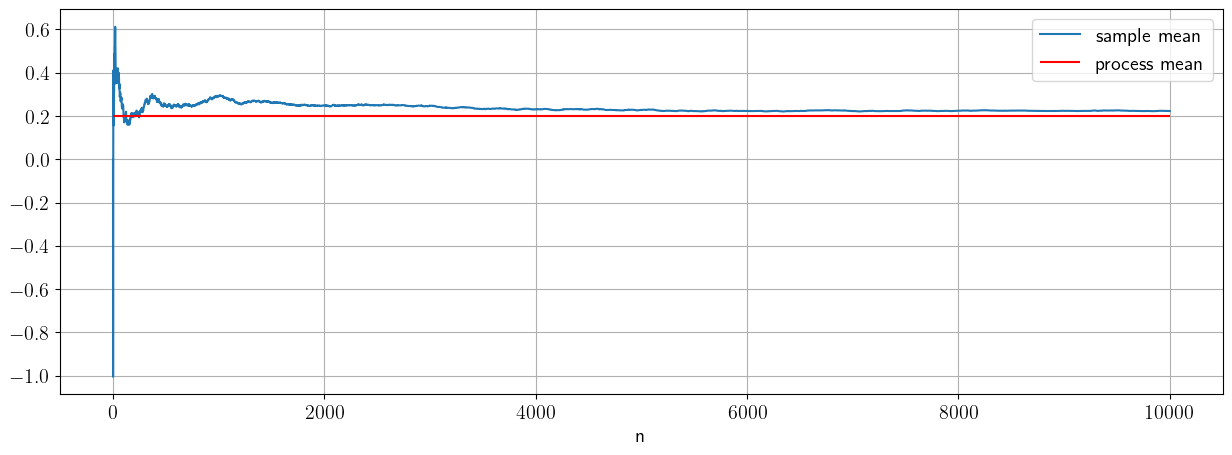

In [4]:
# Consistency 
mu=0.2;
sigma=1;
sample_size_max=10000

#preallocate vector of sample sizes
sample_mean=np.zeros([sample_size_max,1])

X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size_max)

# let's compute the sample mean as a function of sample size (or number of draws)
for n in np.arange(1,sample_size_max):
    sample_mean[n]=(1/n)*np.sum(X_norm[0:n])

fig, ax = plt.subplots(1, 1)
ax.plot(sample_mean,label='sample mean')
ax.hlines(mu,0,sample_size_max,label='process mean',color='r')
ax.grid()
ax.set_xlabel('n')
ax.legend()




## Unbiasedness of Sample Mean 
An estimator is unbiased if its expectation is the same as the process value. 

$$E(\overline{X}_n)=E(X)=\mu$$


While the consistency and unbiasedness look similar, they are actually different. The sample mean is itself a random variable, as it is the sum of $n$ random variables. Thus, it will have a distribution and it will have a mean - or expected - value. 

Here is one way to think about this. Say we are taking daily measurements of a quantity in the lab. We want to measure a true quantity, but we can only do so with some error. Let's say those errors are normally distributed, and we can model our measurement as:

$$X=\mu +\varepsilon$$  

where $\varepsilon$ are random errors with zero-mean and variance $\sigma$. In this case oure measurement $X$ is a random variable whose process mean is the true value of the quantity we are after. 

Let's say we take a sample of size $n$ of that process. Consistency tells us that as the sample mean gets *larger*, i.e., as we take more independent measurements and average them together, we would approach the true mean. The bias tell us what would happen if we repeat the measurement. Say, we take another sample mean of size $n$ tomorrow, and another the day after, and so on. Would the mean of all of those sample means also approach the true mean? Yes, if the estimator is also unbiased. 

In practice, we may not be able to either take an infinitely large sample, or repeate the measurement. It's possible that all we have is a sample of size n. We would like to know whether that sample is an unbiased estimate. 

For the sample mean, this is easy to prove. Since the sample mean is a random variable, we can also apply the law of large numbers to it: Expectation of the sample mean would actually be the average of an infinite number of sample means. 

$$E(\overline{X}_n)=\lim_{k\rightarrow \infty} \frac{1}{k}\sum_{j=1}^k (\overline X_n)_j$$ 

A simple re-ordering of the sums shows us that the sample mean is an unbiased estimator:

$$E(\overline{X}_n)=\lim_{k\rightarrow \infty} \frac{1}{k}\frac{1}{n}\sum_{j=1}^k\sum_{i=1}^n X_{i,j}$$

$$E(\overline{X}_n)=\frac{1}{n}\sum_{j=1}^n\left[\lim_{k\rightarrow \infty} \frac{1}{k}\sum_{i=1}^k X_{i,j}\right]$$

By the law of large numbers,

$$E(\overline{X}_n)=\frac{1}{n}\sum_{j=1}^n n\mu=\mu$$


We will assume that we have multiple samples/batches, each with multiple draw/outcomes/measurements of a random variable. Each sample will have the same size, and we will take the sample mean for each of them. Since we don't have an infinite number of draws, the sample mean will be noisy - it will not be exactly equal to the true process mean. But will the distribution of these sample means be centered around the process mean? 


## Exercise. 
In the cell below, change the number of samples to convince yourself that the expected value of the sample mean converges to the process mean:

Text(0.5, 1.0, 'distribution of sample mean')

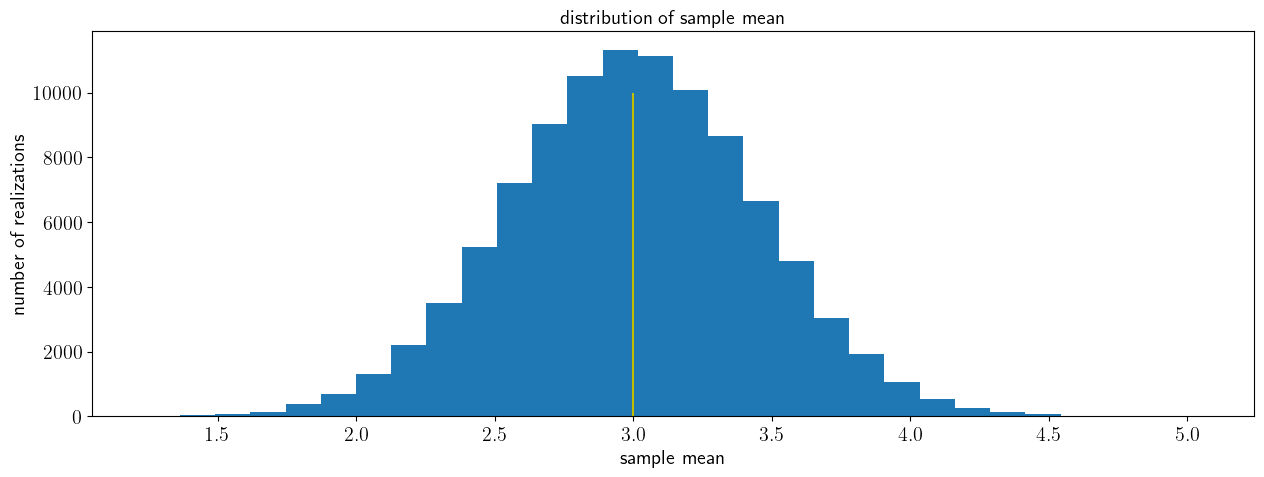

In [5]:
# Unbiasedness
mu=3;
sigma=2;

# sample size and number of samples
sample_size=20
nsamples=100000


# preallocate vector of sample means
sample_mean=np.zeros([nsamples,1])

# compute a number nsamples of sample means
# for each sample, draw sample_size draws and average them to get the sample mean:
for n in np.arange(nsamples):
    X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size)
    sample_mean[n]=(1/sample_size)*np.sum(X_norm)

fig, ax = plt.subplots(1, 1)
ax.hist(sample_mean,30)
ax.vlines(np.mean(sample_mean),ymin=0,ymax=nsamples/10,colors='r',label='expected sample mean')
ax.vlines(mu,ymin=0,ymax=nsamples/10,colors='y',label='process mean')
ax.set_xlabel('sample variance')
ax.set_xlabel('sample mean')
ax.set_ylabel('number of realizations')
ax.set_title('distribution of sample mean')

# Sample Variance / Standard Deviation

Remember, the variance is defined as:

$$V(X)=E([X-\mu)^2]$$

Just like the sample mean, we can define an estimator for the variance as the sample variance. 

$$s_n^2=\frac{1}{n}\sum_{i=1}^n(X_i-\overline{X}_n)^2$$ 

Now let's check consistency and bias for the sample variance
## Consistency 

Text(0, 0.5, 'sample variance')

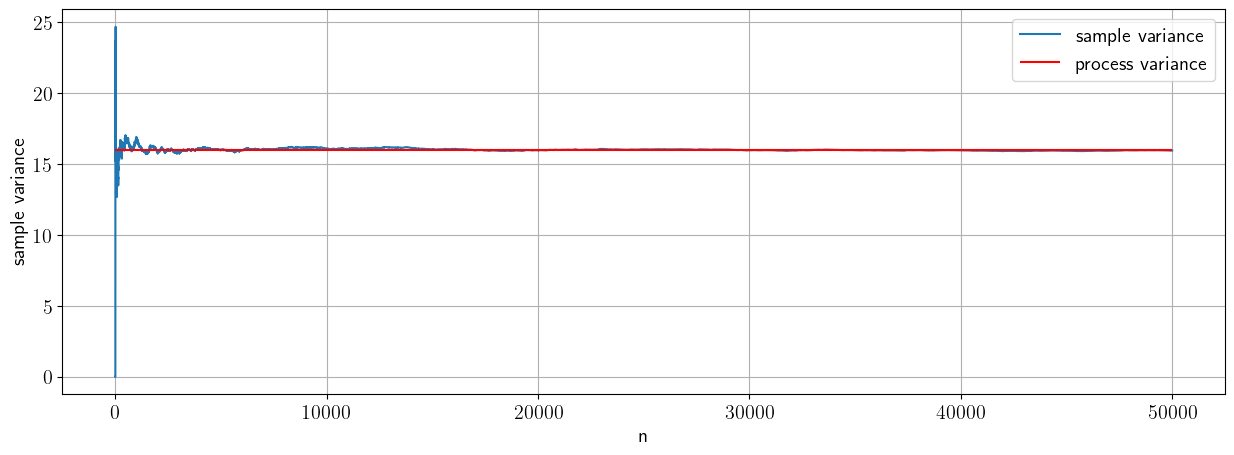

In [6]:
# Consistency
mu=10;
sigma=4; #variance =sigma^2
sample_size_max=50000

#preallocate vector of sample sizes
sample_var=np.zeros([sample_size_max,1])

X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size_max)

# let's compute the sample variance as a function of sample size (or number of draws)
for n in np.arange(1,sample_size_max):
    sample_var[n]=(1/n)*np.sum((X_norm[0:n]-np.mean(X_norm[0:n]))**2)

fig, ax = plt.subplots(1, 1)

ax.plot(sample_var,label='sample variance')
ax.hlines(sigma**2,xmin=0,xmax=sample_size_max,color='r',label='process variance')
ax.grid()
ax.set_xlabel('n')
ax.legend()
ax.set_ylabel('sample variance')

## Biased estimators of sample variance

Let's now check for the bias of this sample variance estimator. Just like before, we will draw a large number of batches (15,000), each with a samples size of 100. For each of these batches we will compute the sample variance, each based on a sample size of 100. 

(0.0, 0.5)

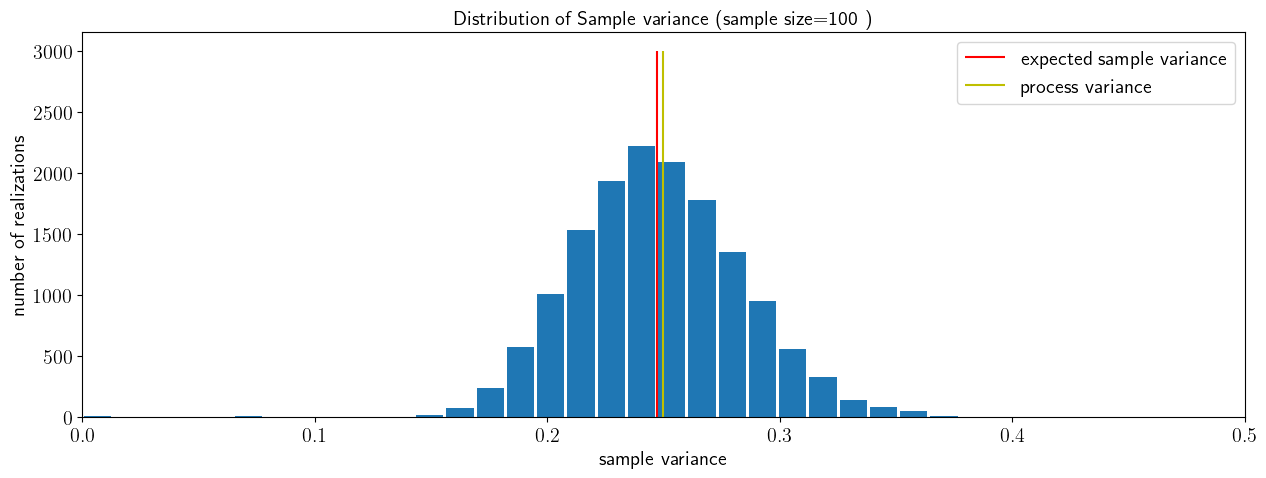

In [7]:
# Bias
mu=0.4;
sigma=0.5; #variance =sigma^2

# sample size and number of samples
sample_size=100
nsamples=15000

# preallocate vector of sample means
sample_var=np.zeros([nsamples,1])

# compute a number nsamples of sample means
for n in np.arange(1,nsamples):
    X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size)
    sample_var[n]=(1/sample_size)*np.sum((X_norm[0:n]-np.mean(X_norm[0:n]))**2)

fig, ax = plt.subplots(1, 1)
ax.hist(sample_var,30,rwidth=0.9)
ax.vlines(np.mean(sample_var),ymin=0,ymax=nsamples/5,colors='r',label='expected sample variance ')
ax.vlines(sigma**2,ymin=0,ymax=nsamples/5,colors='y',label='process variance')
ax.set_xlabel('sample variance')
ax.set_ylabel('number of realizations')
ax.set_title('Distribution of Sample variance (sample size=100 )')
ax.legend()
ax.set_xlim(left=0,right=0.5)


So, the simple sample standard variance is a ***consistent, but biased*** estimator of the process variance. Sure, if the sample is large enough, it will eventually converget. But for finite samples, its expected value is **not** equal to the true value of the process variance. 

It turns out that if we want a consistent *and* unbiased estimator for the variance we have to use a corrected sample variance

$$s_{n-1}^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X}_n)^2$$ 


We will show why that is in class. 

## Exercise:
Show (numerically) that the corrected sample variance is unbiased. Repeat the experiment above by estimating the mean of the distribution of the corrected sample variance, and show that is matches the process variance .

In [8]:
#Exercise Code block

# Sampling Distribution & the central limit theorem

Since the sample mean is a random variable, it means it has a distribution. The Central Limit Theorem tells us what that distribution is:

***Central Limit Theorem:*** 
For a sequence $\{X_1,\ldots, X_n\}$ of independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$, if the sample size $n$ is large enough, the distribution of the sample mean is normal with mean $\mu$ and variance $\sigma^2/n$:

$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i \sim \mathcal N(\mu,\sigma^2/n)$$ 

This is one of the most powerful results in statistics. It tells us how quickly the uncertainty in the mean decreases: in particular, the variance decreases as the number of observations (and that the standard deviation decreases as the square root of the number of observations). 



**Attention** Notice that the Central Limit Theorem does **not** require the random variables to be normal/gaussian. That's right, the sample mean of **any** random variable tends to be normal/gaussian for a large enough sample.  

![Patrikc](https://c.tenor.com/3xoRK7hFE3gAAAAC/patrick-star-spongebob-squarepants.gif "Patrick")

The cell below shows a numerical evaluation of the CLT for an exponential distribution. We will be using values of $n=[1,5,25,200]$ for the sample size over which we take the sample mean.

- pick a sample size $n$ - i.e. the number of samples we are averaging over to compute the sample mean. 
$$ \overline X_n=\frac{1}{n}\sum_i X_n$$
- Repeatedly (i.e. $m=10,000$ times) draw $n$ samples and take their sample mean.
- Plot the histogram of the $m=10,000$ sample means.
- Compare this histogram with means with the theoretical pdf of a gaussian/normal distribution given by the Central Limit Theorem, i.e. a gaussian/normal with mean  $\mu_{clt}=\mu_X$ and variance $\sigma_{clt}^2=\sigma_X^2/n$ (standard deviation <code>scale</code>=$\sigma_{clt}=\sigma_X/\sqrt n$).


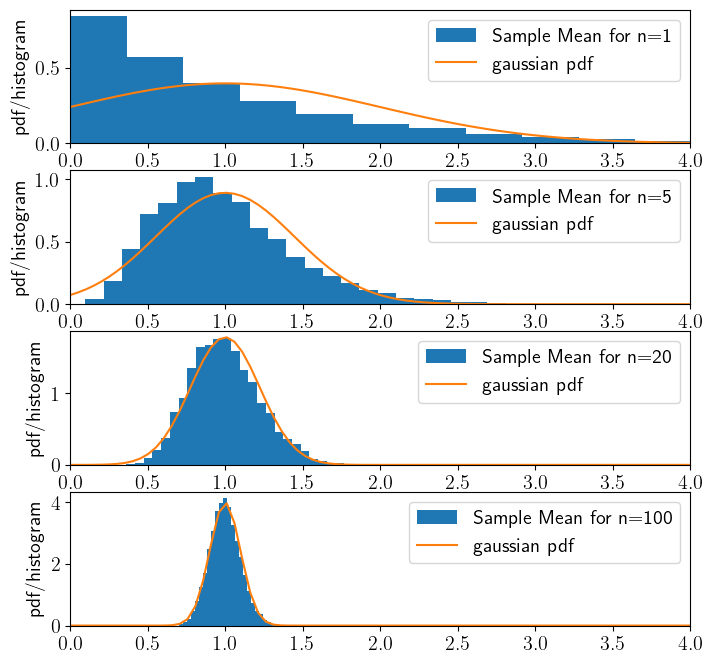

In [82]:
#Answer 
m=10000
n=[1,5,20,100]
Nbins=30

# scale for exponential distribution
scale=1;

# mean and variance for exponential distribution
mu_x=scale
sig_x=scale**2
fig,ax=plt.subplots(4,1,figsize=[8,8])

# repeat the exericse for four value n.
for j in range(4):
    # preallocate vector of sample means
    sample_mean=np.zeros([m,1])
    # compute a number of sample means
    for k in np.arange(m):
        # draw n[j] draws and average them to get the sample mean:
        X=stats.expon.rvs(scale=scale, size=n[j])
        sample_mean[k]=(1/n[j])*np.sum(X)
        
    
    #compute the theoretical pdf given by the CLT
    mu_clt=mu_x
    sig_clt=sig_x/np.sqrt(n[j])
    z=np.linspace(0,5,100);
    norm_pdf=stats.norm.pdf(z,loc=mu_clt,scale=sig_clt);

    ax[j].hist(sample_mean,Nbins,rwidth=1,density=True,label='Sample Mean for n='+str(n[j]))
    ax[j].plot(z,norm_pdf,label='gaussian pdf');
    ax[j].set_xlim(left=0,right=4)
    ax[j].set_ylabel('pdf/histogram')
    ax[j].legend()


### Exercise:

Show numerically that the central limit theorem holds for other distributions.

In [83]:
# Exercise Block

# The extreme value theorem
The Extreme Value Theorem says if the distribution of block maxima of any distribution converges, than it converges to a GEV distribution. 

For a sequence $\{X_1,\ldots, X_n\}$ of independent and identically distributed random variables, and for large enough $n$, if their maximum converges, it converges to a GEV: 

$$\max{\{X_1,\ldots, X_n\}} \sim G(x)$$

For example, we can consider $X$ to be the amount of daily precipitation that falls in a certain location. If $n=365$ than $Y=\max{\{X_1,\ldots, X_n\}}$ is a random variable that describes the rainiest day in a given year. 

This is a result that is for a sample maxima, what the Central Limit Theorem is for the sample mean. Note that unlike the CLT, the maxima may not always converge. But if it does converge, than it converges to a GEV. 

The power of the GEV, like the power of the CLT, is that you can apply it when you don't know the underlying distribution. In particular, even if we don't know the exact distribution of daily precipitation, the CLT tells us that the distribution of annual-mean precipitation should still be normal, and the extreme value theorem tells us that the distribution of annual-max precipitation should be GEV-distributed, allowing us to model these and make predictions of things like flood recurrence times. 

The cells below show the behaviour of sample/block maxima for an exponential and a uniform distribution. 

## Exponential distribution

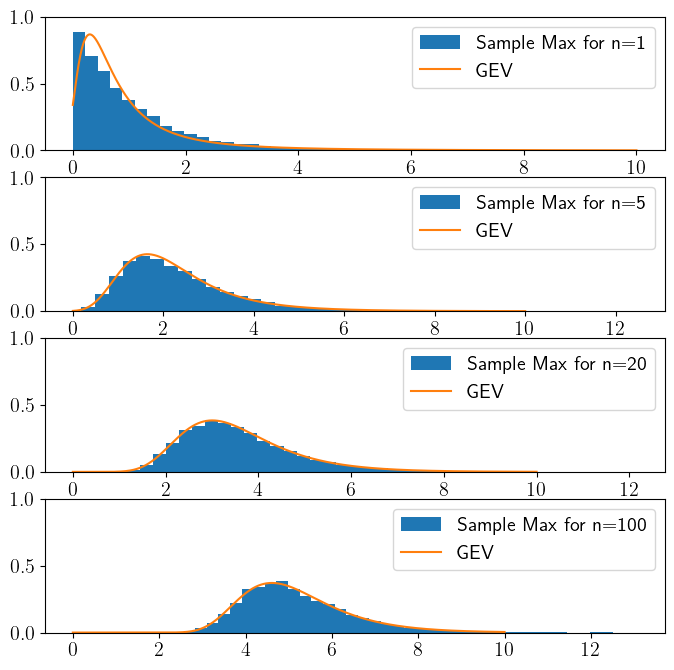

In [86]:
m=10000
n=[1,5,20,100]
Nbins=40
shape=1
scale=1;

mu_x=scale
sig_x=scale**2
fig,ax=plt.subplots(4,1,figsize=[8,8])

for j in range(4):
    # preallocate vector of sample means
    sample_max=np.zeros([m,1])
    for k in np.arange(m):
        X=stats.expon.rvs(scale=scale,size=n[j])
        sample_max[k]=np.max(X)
    # compute a number nsamples of sample means
    # for each sample, draw sample_size draws and average them to get the sample mean:
   
    z=np.linspace(0,10,10000);
    
    # fit a GEV to the data. We will talk more about fitting distributions in the next module.
    c,loc_gev,scale_gev=stats.genextreme.fit(sample_max)
    
    gev_pdf=stats.genextreme.pdf(z,c,loc=loc_gev,scale=scale_gev)
    
    ax[j].hist(sample_max,Nbins,rwidth=1,density=True,label='Sample Max for n='+str(n[j]))
    ax[j].plot(z,gev_pdf,label='GEV');
    ax[j].set_ylim(0,1);
    ax[j].legend()


## Uniform distribution


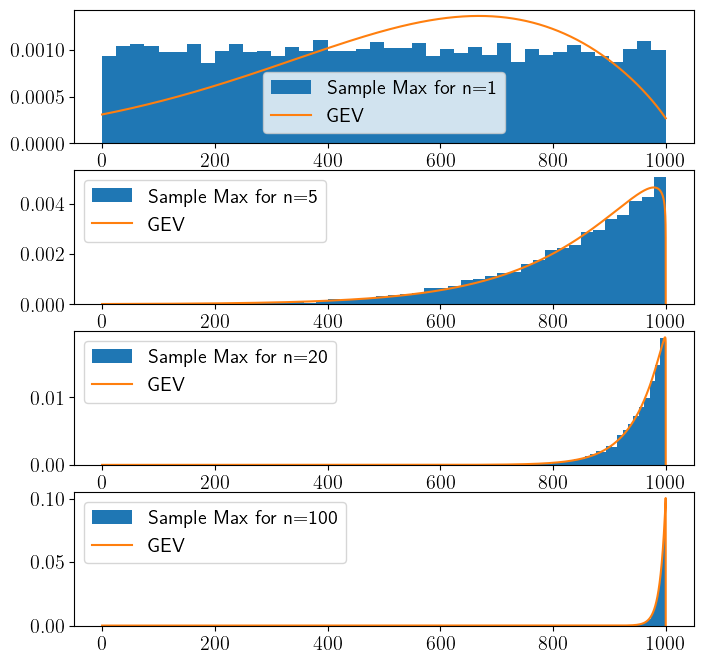

In [85]:
# Uniform Distribution 
m=10000
n=[1,5,20,100]
Nbins=40

scale=1000;

fig,ax=plt.subplots(4,1,figsize=[8,8])

for j in range(4):
    # preallocate vector of sample means
    sample_max=np.zeros(m)
    for k in np.arange(m):
        X=stats.uniform.rvs(scale=scale,size=n[j])
        sample_max[k]=np.max(X)
    # compute a number nsamples of sample means
    # for each sample, draw sample_size draws and average them to get the sample mean:
   
    z=np.linspace(0,1000,10000);
    

    c,loc_gev,scale_gev=stats.genextreme.fit(sample_max)    
    gev_pdf=stats.genextreme.pdf(z,c,loc=loc_gev,scale=scale_gev)
    
    ax[j].hist(sample_max,Nbins,rwidth=1,density=True,label='Sample Max for n='+str(n[j]))
    ax[j].plot(z,gev_pdf,label='GEV');
    ax[j].legend()


# Sample Covariance and Correlation
## Pearson Correlation Coefficeient
Just like for variance, we can estimate sample covariance and sample correlation. 
Most commonly, we will estimate sample correlation, using the [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) $\rho$. 

$$ \rho=\frac{\frac{1}{n-1}\sum\left(x_{i}y_{i}-\overline{x}\overline{y}\right)}{s_{x}s_{Y}}$$

where $s_{x}$ is the bias corrected sample variance: 

$$ s_{x}=\sqrt{\frac{1}{n-1}\sum\left(x_{i}^{2}-\overline{x}\right)}$$ 


The cell below draws sample_size outcomes from multivariate normal distribution with true process $\rho=0.8$. It then use the sample $\rho$ to estimate the correlation coefficient. 

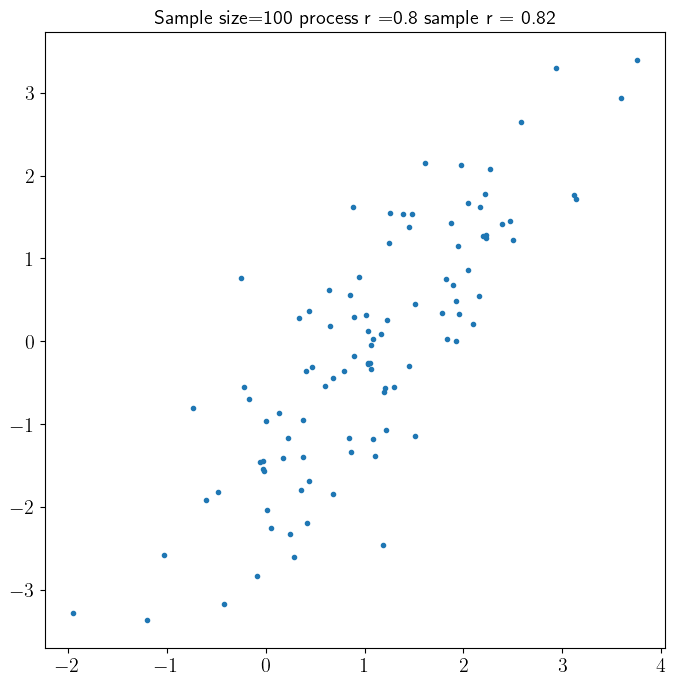

In [14]:
sample_size=100
mu_x=1     # mean of X
mu_y=0     # mean of Y
var_X=1    # Variance of X
var_Y=2    # variance of Y
rho=0.8  # Correlation coefficient
        
# make a covariance matrix
mu_vec= np.array([mu_x,mu_y])
cov_mat = np.array([[var_X, rho*np.sqrt(var_X*var_Y)], [rho*np.sqrt(var_X*var_Y), var_Y]])
Xvec=stats.multivariate_normal.rvs(cov = cov_mat, mean = mu_vec,size=sample_size)    
x=Xvec[:,0]
y=Xvec[:,1]


sample_rho=stats.pearsonr(x,y)[0]
    
fig,ax=plt.subplots(1,figsize=[8,8])
plt.title('Sample size='+str(sample_size)+' process r ='+str(rho)+' sample r = '+str(round(sample_rho,2)))
plt.plot(x,y,'.')

## Spurious Correlation

Correlation coefficents are noisy. You can get a non-zero correlation even the true process correlation is zero. That is, given two independent random variables, if we only have a small sample size from them and compute the sample correlation, it will likely be non-zero. Only when we have a very large number of samples does the sample correlation converge to zero.  This is the basis of many many many spurious results in science, especially in social sciences. 

In the code below we look at the distribution of the sample correlation coefficient for a small sample. We draw from two independent random variables (true process correlation is zero), and we plot the distribution of sample correlation. It is centered around zero, but notice that even for a decent sample size (e.g. 50) we can still get correlations of 0.4 when in fact the variables are independent. Later on, this observation will be the basis of hypothesis testing. 




(array([5.43720783e-03, 1.08744157e-02, 1.35930196e-02, 3.80604548e-02,
        9.78697409e-02, 1.87583670e-01, 4.21383607e-01, 5.98092861e-01,
        9.13450915e-01, 1.19618572e+00, 1.59853910e+00, 2.16400872e+00,
        2.38965284e+00, 2.77841320e+00, 2.81103645e+00, 2.54461326e+00,
        2.35159239e+00, 1.94108319e+00, 1.74262511e+00, 1.30764848e+00,
        8.75390460e-01, 5.68188218e-01, 2.82734807e-01, 1.71272047e-01,
        1.08744157e-01, 4.34976626e-02, 1.63116235e-02, 2.71860391e-03,
        2.71860391e-03, 2.71860391e-03]),
 array([-0.52942613, -0.49264254, -0.45585896, -0.41907537, -0.38229179,
        -0.3455082 , -0.30872461, -0.27194103, -0.23515744, -0.19837386,
        -0.16159027, -0.12480669, -0.0880231 , -0.05123952, -0.01445593,
         0.02232766,  0.05911124,  0.09589483,  0.13267841,  0.169462  ,
         0.20624558,  0.24302917,  0.27981276,  0.31659634,  0.35337993,
         0.39016351,  0.4269471 ,  0.46373068,  0.50051427,  0.53729786,
         0.57408

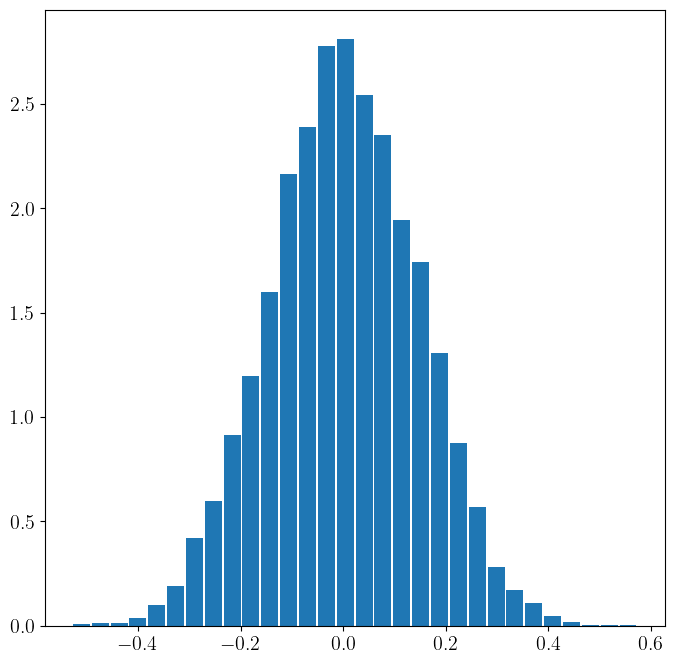

In [15]:
#parameters

# sample size and number of samples
sample_size=50
nsamples=10000

mu_x=1     # mean of X
mu_y=0     # mean of Y
var_X=1    # Variance of X
var_Y=2    # variance of Y
rho=0  # Correlation coefficient
        
# make a covariance matrix
mu_vec= np.array([mu_x,mu_y])
cov_mat = np.array([[var_X, rho*np.sqrt(var_X*var_Y)], [rho*np.sqrt(var_X*var_Y), var_Y]])

# preallocate vector of sample rhos
sample_rho=np.zeros([nsamples,1])

# compute a number nsamples of correlation
for j in np.arange(nsamples):
    Xvec=stats.multivariate_normal.rvs(cov = cov_mat, mean = mu_vec,size=sample_size)    
    x=Xvec[:,0]
    y=Xvec[:,1]
    
    rho=stats.pearsonr(x,y)
    sample_rho[j]=rho[0]
    
fig,ax=plt.subplots(1,figsize=[8,8])
ax.hist(sample_rho,30,density=True,rwidth=0.9)

## Exercise
- Redo the scatter plot above (two code blocks above). Set the correlation to zero and, for different sample sizes, draw samples from the distribution.